# Kelompok 3

### Nama Anggota

- Anak Agung Istri Agung Yulia Prameswari (2208541007)
- Ni Kadek Wanda Indra Paramitha          (2208541022)
- Ni Putu Karistya Paicha Maesi           (2208541024)
- Ni Luh Ketut Marsanda Putri Prasanti    (2208541026)

### Dataset : Konsumen Berhenti

Dataset Konsumen Berhenti berisi tentang konsumen yang berhenti atau tidak berhenti menjadi pelanggan dalam suatu layanan. Dataset ini dapat digunakan untuk analisis dan pemodelan prediksi terkait perilaku churn (berhenti) seorang pelanggan terhadap suatu layanan.

### Tujuan Analisis Data

- Akan dianalisis faktor penyebab yang mempengaruhi seorang pelanggan memutuskan untuk berhenti menggunakan suatu layanan
- Apakah kita bisa memprediksi seorang pelanggan akan churn (berhenti) atau tidak dalam menggunakan suatu layanan


# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Exploratory Data Analysis¶

Exploratory Data Analysis (EDA) adalah proses analisis data yang digunakan untuk memahami karakteristik, pola, dan hubungan dalam dataset. EDA melibatkan eksplorasi visual dan deskriptif dari data untuk mengidentifikasi pemahaman awal tentang data sebelum melangkah ke tahap pemodelan atau analisis yang lebih lanjut.

## - Memanggil Data

In [2]:
data = pd.read_csv('Data Konsumen.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## - Membaca Dataset

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

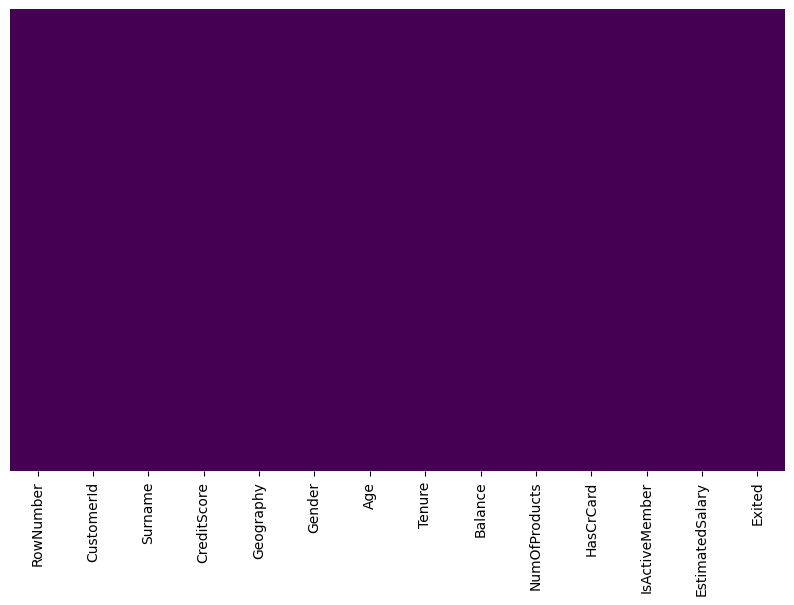

In [8]:
plt.figure (figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels = False, cmap = 'viridis' , cbar = False)

## - Korelasi antar Dataset

In [9]:
data.corr().style.background_gradient().set_precision(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.00,0.00,0.01,0.00,-0.01,-0.01,0.01,0.00,0.01,-0.01,-0.02
CustomerId,0.00,1.00,0.01,0.01,-0.01,-0.01,0.02,-0.01,0.00,0.02,-0.01
CreditScore,0.01,0.01,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,0.00,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,-0.01,-0.01,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,-0.01,-0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,0.02,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,0.00,-0.01,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.01,0.00,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.01,0.02,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01


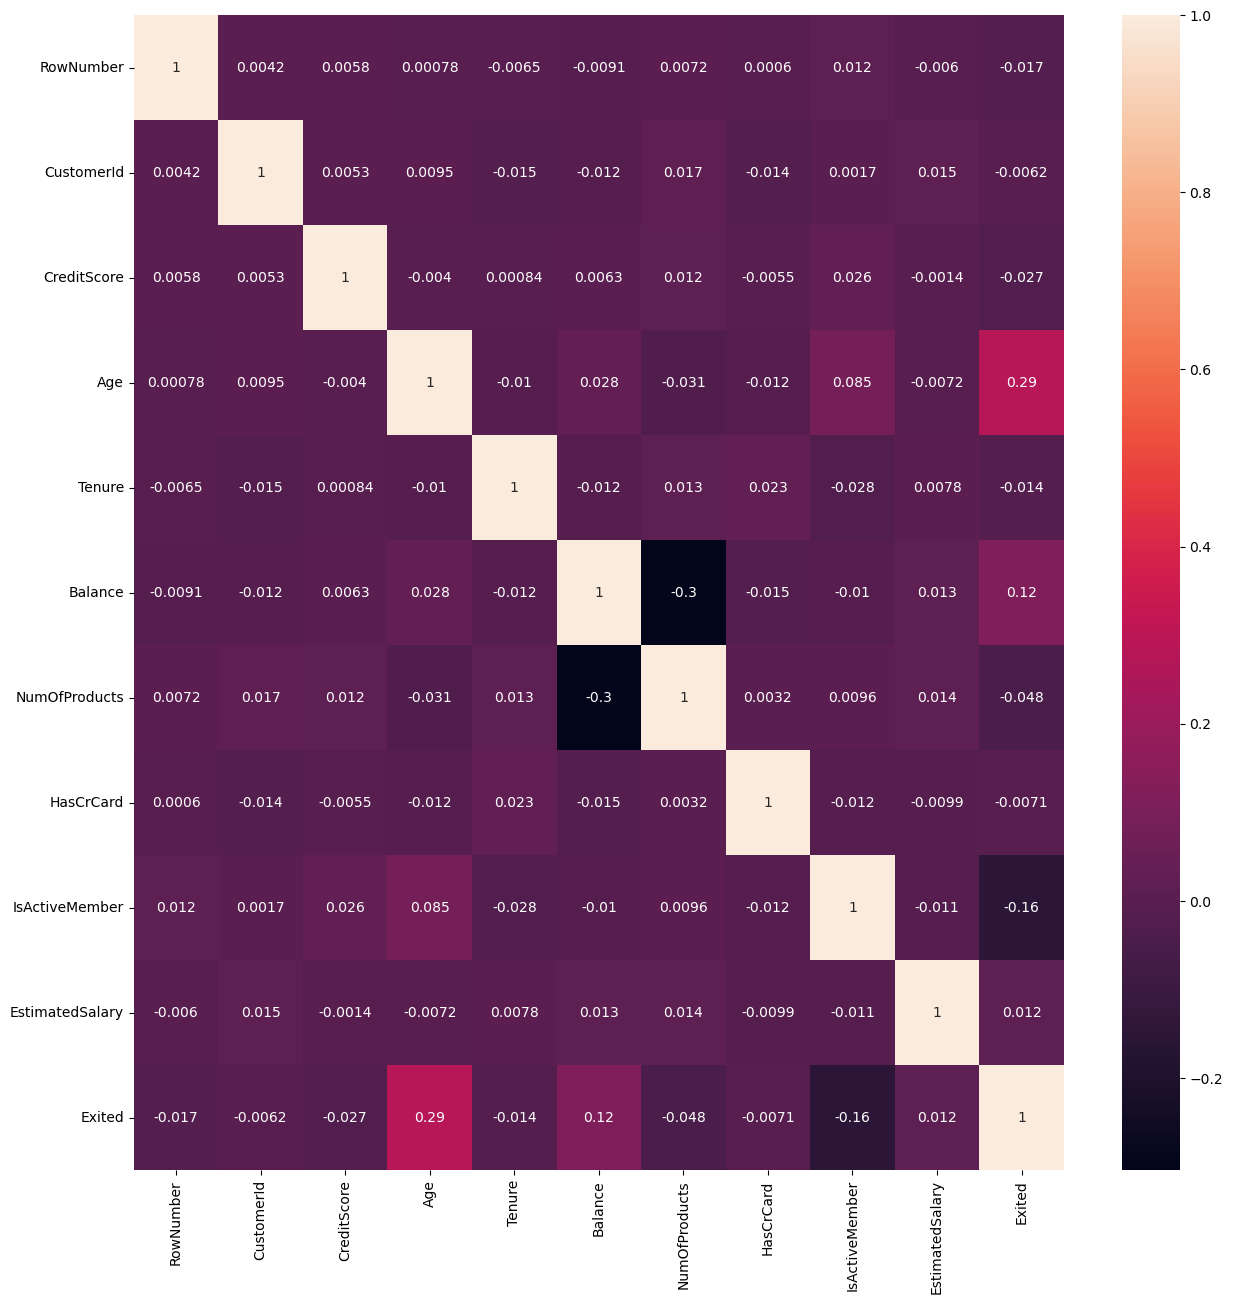

In [10]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), ax = ax, annot = True)
plt.show()

# 2. Feature Engineering

Feature engineering adalah proses manipulasi dan transformasi data mentah untuk menciptakan fitur-fitur baru yang lebih informatif dan relevan dalam konteks pemodelan data. Dalam hal ini akan dilakukan -

## - One Hot Encoding

Fungsi utama dari One Hot Encoding adalah mengubah variabel kategorikal menjadi representasi numerik yang dapat digunakan oleh model machine learning. Dalam one hot encoding, setiap nilai unik dalam variabel kategorikal diubah menjadi kolom terpisah dalam dataframe baru.

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data['Geography'] = \
data['Geography'].map({'France':0, 'Spain':1, 'Germany':2})

In [13]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
data['Gender'] = \
data['Gender'].map({'Female':0, 'Male':1})

In [15]:
dt = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [16]:
dt = pd.get_dummies(dt)
dt

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


## - Normalisasi Data

Normalisasi atau standarisasi data berfungsi untuk mengubah kolom numerik dengan rentang nilai yang berbeda menjadi skala yang seragam. Ini dapat membantu algoritma pemodelan dalam memperlakukan kolom dengan adil dan memudahkan perbandingan antar kolom dalam dataset.

In [17]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(dt)
dn = pd.DataFrame(d, columns=dt.columns)

## - Dataset Hasil

In [18]:
dn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,0.5,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,0.5,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.844,1.0,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


In [19]:
dn.dtypes

CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

# 3. Predictive Modelling

## - Membagi data menjadi X dan y

In [20]:
X = dn.drop(['Exited'],axis=1)
y = dn['Exited']

In [21]:
from collections import Counter
print(sorted(Counter(dn['Exited']).items()))

[(0.0, 7963), (1.0, 2037)]


## - Split Train dan Test Data

In [22]:
from sklearn.model_selection import train_test_split
# Mengasumsikan X dan y adalah dataset dan label yang sesuai
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Fungsi dari 'Train_test_split' yaitu membagi data menjadi data yang mana
# untuk kita gunakan sebagai data pelatihan dan pengujian. Disini kami
# mengunakan 0.2 data pengujian yang dimana 0.8 nya akan menjadi data pelatihan

In [23]:
len(X_train), len(X_test)
# Memberikan jumlah sampel dalam data pelatihan (X_train) dan data 
# pengujian (X_test) lalu dalam kode 'len(X_train)' akan mengembalikan jumlah sampel dalam set pelatihan

(8000, 2000)

In [24]:
len(y_train), len(y_test)
# Memberikan jumlah sampel dalam data pelatihan (y_train) dan data 
# pengujian (y_test) lalu dalam kode 'len(y_train)' akan mengembalikan jumlah sampel dalam set pelatihan

(8000, 2000)

## - Permodelan Dataset dengan Metode Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
model.score(X_test,y_test)

0.818

## - Balancing Dataset dengan Metode Over Sampling

In [28]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
Xr, yr = ros.fit_resample(X, y)
print(sorted(Counter(yr).items()), yr.shape)

[(0.0, 7963), (1.0, 7963)] (15926,)


## - Permodelan Dataset Balance dengan Metode Logistic Regression

In [30]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,yr, test_size=0.2)
model = LogisticRegression()
model.fit(Xr_train,yr_train)

LogisticRegression()

In [31]:
len(Xr_train), len(Xr_test)

(12740, 3186)

In [32]:
len(yr_train), len(yr_test)

(12740, 3186)

In [33]:
yr_pred = model.predict(Xr_test)

In [34]:
model.score(Xr_test,yr_test)

0.6958568738229756

# 4. Pengujian Model dengan Memasukkan Data Random

In [35]:
dt.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
import numpy as np
data_random = np.array([[584, 0, 1, 18, 3, 71, 1, 0, 0, 11]])
prediction = model.predict(data_random)

if prediction[0] == 0:
    print("Pelanggan diperkirakan tidak akan berhenti.")
else:
    print("Pelanggan diperkirakan akan berhenti.")

#permodelan dengan data Age(umur) yang masih muda dan Balance(saldo) yang sedikit diperkirakan tidak akan berhenti.

Pelanggan diperkirakan tidak akan berhenti.


In [37]:
import numpy as np
data_random = np.array([[850, 2, 0, 92, 10, 127644, 4, 1, 1, 149388]])
prediction = model.predict(data_random)

if prediction[0] == 0:
    print("Pelanggan diperkirakan tidak akan berhenti.")
else:
    print("Pelanggan diperkirakan akan berhenti.")
    
#permodelan dengan data Age(umur) yang sudah tua dan Balance(saldo) yang banyak diperkirakan akan berhenti.

Pelanggan diperkirakan akan berhenti.


# 5. Kesimpulan

1. Berdasarkan tabel korelasi, ada beberapa faktor yang cukup berpengaruh terhadap keputusan seorang pelanggan untuk churn atau tidak, seperti:
- Terdapat korelasi positif yang moderat antara umur (Age) dengan keputusan pelanggan untuk berhenti (Exited). Hal ini    menunjukkan bahwa semakin tua seorang pelanggan, semakin mungkin mereka berhenti.
- Terdapat korelasi positif yang lemah antara saldo (Balance) dengan keputusan pelanggan untuk berhenti (Exited). Ini menunjukkan bahwa pelanggan dengan saldo yang lebih tinggi cenderung lebih mungkin untuk berhenti.
- Sehingga, dapat ditarik kesimpulan bahwa umur dan saldo merupakan dua faktor yang paling mempengaruhi keputusan konsumen untuk churn atau tidak

2. Berdasarkan analisis data dan pengujian model dengan data random, maka dapat dikitehui bahwa kita bisa memprediksi seorang pelanggan akan churn (berhenti) atau tidak dalam menggunakan suatu layanan dengan tingkat akurasi sebesar 69%